In [ ]:
!pip install nptyping

# Heart Failure Clinical Records

### Data, Code, Reference

- **(`R`) Code**: [Github Repo](https://github.com/davidechicco/cardiovascular_heart_disease)

- **Data**: [UCI ML Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv) | [FigShare](https://plos.figshare.com/articles/Survival_analysis_of_heart_failure_patients_A_case_study/5227684/1)

![Reference Paper](./ref_paper.png "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone")

**Paper**: Chicco, D.; Jurman, G. 

_Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone_ [link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

## Abstract

#### Background

> Cardiovascular diseases kill approximately $17$ million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (`HF`) occurs when the heart cannot pump enough blood to meet the needs of the body.
>
>Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise undetectable by medical doctors. 
>
> Machine learning, in particular, can predict patients’ survival from their data and can individuate the most important features among those included in their medical records.

#### Methods

> Authors analyze a dataset of `299` patients with heart failure collected in `2015`. 

The learning task has two objectives: (**1**) Apply several machine learning classifiers to predict the patients survival, and (**2**) **rank** the features corresponding to the most important risk factors. 

> \[authors\] also perform an alternative feature ranking analysis by employing traditional biostatistics tests, and compare these results with those provided by the machine learning algorithms. Since both feature ranking approaches clearly identify `serum creatinine` and `ejection fraction` as the two most relevant features, we then build the machine learning survival prediction models on these two factors alone.

#### Results

> Our results of these two-feature models show not only that serum creatinine and ejection fraction are sufficient to predict survival of heart failure patients from medical records, but also that **using these two features alone can lead to more accurate predictions** than using the original dataset features in its entirety.

---

In [1]:
import sys
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter


%matplotlib inline

In [4]:
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

###### Load Data into `pandas.DataFrame`

In [5]:
data = pd.read_csv(DATA_URL)

###### Features (names)

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

###### Data at a first glance

In [7]:
data.shape

(299, 13)

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']

categorical_features = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']

In [10]:
X = data.loc[:, ~data.columns.isin(("DEATH_EVENT",))]

In [11]:
X_cat = pd.get_dummies(X[categorical_features])

In [12]:
X_num = X[numerical_features]

In [13]:
y = data["DEATH_EVENT"].astype(np.int)

In [14]:
# Helper Function
def plot_sample_distribution(labels, color='C0', title=''):
    """Plot the Distribution count of samples per labels.
    The matplotlib axis is returned.
    """
    
    fig, ax = plt.subplots(figsize=(7, 8))
    counts, bins, _ = plt.hist(labels, bins=3, 
                               color=color)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", 
                   top="off", labelbottom="on", 
                   left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#e2e2e2', zorder=1)

    # Remove title
    ax.set_title(title)

    # Set x-axis label
    ax.set_xlabel("Death Event", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    ax.annotate(str(int(counts[0])), 
                xy=(bins[0] + 0.15, counts[0] + 2), 
                size=14)
    ax.annotate(str(int(counts[2])), 
                xy=(bins[2] + 0.15, counts[2] + 2), 
                size=14)
    return ax

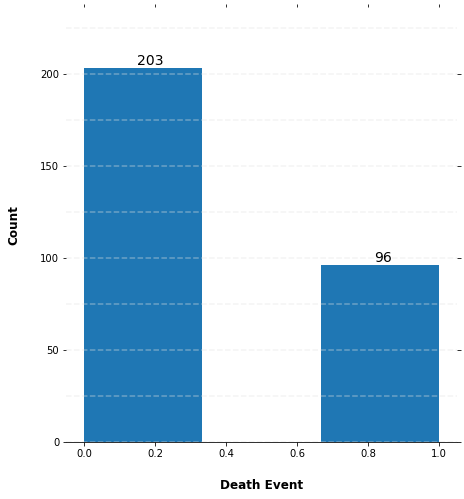

In [15]:
plot_sample_distribution(y.values)
plt.show()

### Descriptive Statistics

##### Statistics for Categorical Variables

In [16]:
X_cat[y == 0].describe(percentiles=[]).T

,count,mean,std,min,50%,max
anaemia,203.0,0.408867,0.492840,0.0,0.0,1.0
high_blood_pressure,203.0,0.325123,0.469579,0.0,0.0,1.0
diabetes,203.0,0.418719,0.494569,0.0,0.0,1.0
sex,203.0,0.650246,0.478071,0.0,1.0,1.0
smoking,203.0,0.325123,0.469579,0.0,0.0,1.0


In [17]:
X_cat[y == 1].describe(percentiles=[]).T

,count,mean,std,min,50%,max
anaemia,96.0,0.479167,0.502188,0.0,0.0,1.0
high_blood_pressure,96.0,0.406250,0.493710,0.0,0.0,1.0
diabetes,96.0,0.416667,0.495595,0.0,0.0,1.0
sex,96.0,0.645833,0.480771,0.0,1.0,1.0
smoking,96.0,0.312500,0.465946,0.0,0.0,1.0


##### Statistics for Numerical Variables

In [18]:
X_num.describe(percentiles=[]).T

,count,mean,std,min,50%,max
age,299.0,60.833893,11.894809,40.0,60.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,250.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,38.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,262000.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,1.1,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,137.0,148.0
time,299.0,130.260870,77.614208,4.0,115.0,285.0


In [19]:
X_num[y == 1].describe(percentiles=[]).T

,count,mean,std,min,50%,max
age,96.0,65.215281,13.214556,42.0,65.0,95.0
creatinine_phosphokinase,96.0,670.197917,1316.580640,23.0,259.0,7861.0
ejection_fraction,96.0,33.468750,12.525303,14.0,30.0,70.0
platelets,96.0,256381.044792,98525.682856,47000.0,258500.0,621000.0
serum_creatinine,96.0,1.835833,1.468562,0.6,1.3,9.4
serum_sodium,96.0,135.375000,5.001579,116.0,135.5,146.0
time,96.0,70.885417,62.378281,4.0,44.5,241.0


In [20]:
X_num[y == 0].describe(percentiles=[]).T

,count,mean,std,min,50%,max
age,203.0,58.761906,10.637890,40.0,60.0,90.0
creatinine_phosphokinase,203.0,540.054187,753.799572,30.0,245.0,5209.0
ejection_fraction,203.0,40.266010,10.859963,17.0,38.0,80.0
platelets,203.0,266657.489901,97531.202283,25100.0,263000.0,850000.0
serum_creatinine,203.0,1.184877,0.654083,0.5,1.0,6.1
serum_sodium,203.0,137.216749,3.982923,113.0,137.0,148.0
time,203.0,158.339901,67.742872,12.0,172.0,285.0


In [21]:
from IPython.display import HTML

HTML("""<table><thead class="c-article-table-head">
<tr><th class="u-text-left ">&nbsp;</th><th class="u-text-left " colspan="3">Full sample</th><th class="u-text-left " colspan="3">Dead patients</th><th class="u-text-left " colspan="3">Survived patients</th></tr><tr><th class="u-text-left ">Numeric feature</th><th class="u-text-left ">Median</th><th class="u-text-left ">Mean</th><th class="u-text-left "><i>σ</i></th><th class="u-text-left ">Median</th><th class="u-text-left ">Mean</th><th class="u-text-left "><i>σ</i></th><th class="u-text-left ">Median</th><th class="u-text-left ">Mean</th><th class="u-text-left "><i>σ</i></th></tr></thead><tbody><tr><td class="u-text-left ">Age</td><td class="u-text-left ">60.00</td><td class="u-text-left ">60.83</td><td class="u-text-left ">11.89</td><td class="u-text-left ">65.00</td><td class="u-text-left ">65.22</td><td class="u-text-left ">13.21</td><td class="u-text-left ">60.00</td><td class="u-text-left ">58.76</td><td class="u-text-left ">10.64</td></tr><tr><td class="u-text-left ">Creatinine phosphokinase</td><td class="u-text-left ">250.00</td><td class="u-text-left ">581.80</td><td class="u-text-left ">970.29</td><td class="u-text-left ">259.00</td><td class="u-text-left ">670.20</td><td class="u-text-left ">1316.58</td><td class="u-text-left ">245.00</td><td class="u-text-left ">540.10</td><td class="u-text-left ">753.80</td></tr><tr><td class="u-text-left ">Ejection fraction</td><td class="u-text-left ">38.00</td><td class="u-text-left ">38.08</td><td class="u-text-left ">11.83</td><td class="u-text-left ">30.00</td><td class="u-text-left ">33.47</td><td class="u-text-left ">12.53</td><td class="u-text-left ">38.00</td><td class="u-text-left ">40.27</td><td class="u-text-left ">10.86</td></tr><tr><td class="u-text-left ">Platelets</td><td class="u-text-left ">262.00</td><td class="u-text-left ">263.36</td><td class="u-text-left ">97.80</td><td class="u-text-left ">258.50</td><td class="u-text-left ">256.38</td><td class="u-text-left ">98.53</td><td class="u-text-left ">263.00</td><td class="u-text-left ">266.66</td><td class="u-text-left ">97.53</td></tr><tr><td class="u-text-left ">Serum creatinine</td><td class="u-text-left ">1.10</td><td class="u-text-left ">1.39</td><td class="u-text-left ">1.03</td><td class="u-text-left ">1.30</td><td class="u-text-left ">1.84</td><td class="u-text-left ">1.47</td><td class="u-text-left ">1.00</td><td class="u-text-left ">1.19</td><td class="u-text-left ">0.65</td></tr><tr><td class="u-text-left ">Serum sodium</td><td class="u-text-left ">137.00</td><td class="u-text-left ">136.60</td><td class="u-text-left ">4.41</td><td class="u-text-left ">135.50</td><td class="u-text-left ">135.40</td><td class="u-text-left ">5.00</td><td class="u-text-left ">137.00</td><td class="u-text-left ">137.20</td><td class="u-text-left ">3.98</td></tr><tr><td class="u-text-left ">Time</td><td class="u-text-left ">115.00</td><td class="u-text-left ">130.30</td><td class="u-text-left ">77.61</td><td class="u-text-left ">44.50</td><td class="u-text-left ">70.89</td><td class="u-text-left ">62.38</td><td class="u-text-left ">172.00</td><td class="u-text-left ">158.30</td><td class="u-text-left ">67.74</td></tr></tbody></table>""")

---

## Survival Machine Learning Prediction

#### Warm-up

In this warm-up section, we are going to set up 
a very simple **pipeline** for Survival Machine learning Prediction

In `sklearn` there is a predefined object specifically created to generate ML Pipelines, 
starting from feature preprocessing to model prediction (i.e. *always the last step*).

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
def random_forest_hf_pipeline(random_state=7, **rf_kwargs):
    """"""
    encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')

    transformer = ColumnTransformer([('cat', encoder, categorical_features),], 
                                   remainder='passthrough')
    return Pipeline([('preprocess', transformer),
                     ('classifier', RandomForestClassifier(n_estimators=500, 
                                                           random_state=random_state, 
                                                           **rf_kwargs))
                    ])

rf = random_forest_hf_pipeline()

#### Selecting only Clinical Features



In [25]:
clinical_features = categorical_features + numerical_features[:-1]  # getting rid of "time" column
clinical_features

['anaemia',
 'high_blood_pressure',
 'diabetes',
 'sex',
 'smoking',
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

In [26]:
X_clinical = X[clinical_features]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clinical, y, stratify=y, random_state=7)

In [28]:
X_clinical.shape

(299, 11)

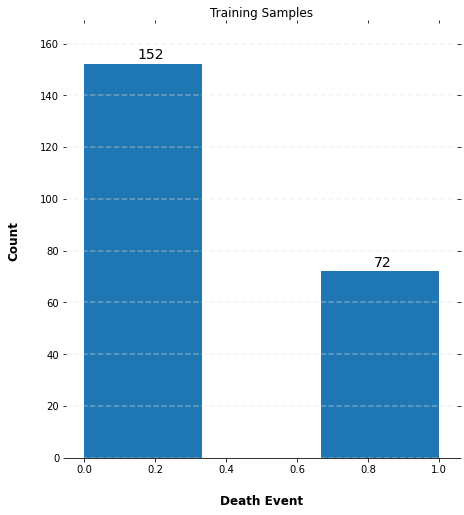

In [29]:
plot_sample_distribution(y_train, color='C0', title='Training Samples')
plt.show()

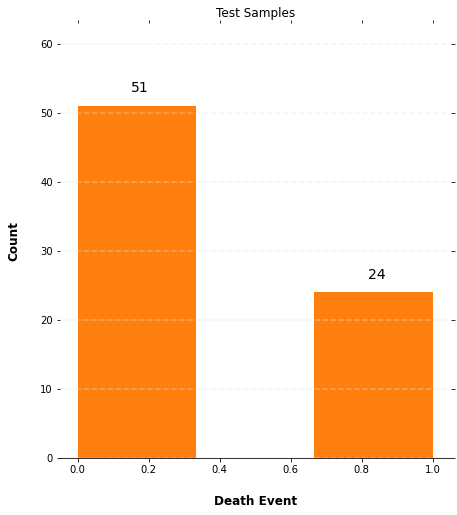

In [31]:
plot_sample_distribution(y_test, color='C1', title='Test Samples')
plt.show()

###### Fit the Model

The next step will be to start triggering the `pipeline` calling the `fit` method.
`sklearn` will automatically invoke the entire pipeline, terminating with the invocation of the 
`classifier.fit` method.

In [32]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['anaemia',
                                                   'high_blood_pressure',
                                                   'diabetes', 'sex',
                                                   'smoking'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=500, random_state=7))])

###### Performance Evaluation

Final step of a pipeline: evaluating the performance on **training** and **test** set.

In this case, we will use the `score` method of the classifier, corresponding to the 
**Accuracy Score**

###### Short Recap

If $\hat{y}_i$ corresponds to the prediction generated by the model for $i-th$ sample, and $y_i$ the corresponding **expected** target in the ground-truth, the **Accuracy** is defined as:

$$
\mathtt{accuracy}(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}} 1(\hat{y_i} = y_i)
$$

where $1(x)$ is the **indicator function**

In [33]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.653


**Looks promising**, doesn't it?

In [112]:
ohe = rf.named_steps['preprocess'].named_transformers_['cat']
feature_names = ohe.get_feature_names(input_features=categorical_features)

In [113]:
feature_names

array(['anaemia_0', 'anaemia_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'diabetes_0', 'diabetes_1', 'sex_0',
       'sex_1', 'smoking_0', 'smoking_1'], dtype=object)

In [114]:
feature_names = np.r_[feature_names, numerical_features[:-1]]

In [115]:
feature_names

array(['anaemia_0', 'anaemia_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'diabetes_0', 'diabetes_1', 'sex_0',
       'sex_1', 'smoking_0', 'smoking_1', 'age',
       'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'], dtype=object)

In [116]:
feature_names.shape

(16,)

In [117]:
tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

In [118]:
len(sorted_idx)

16

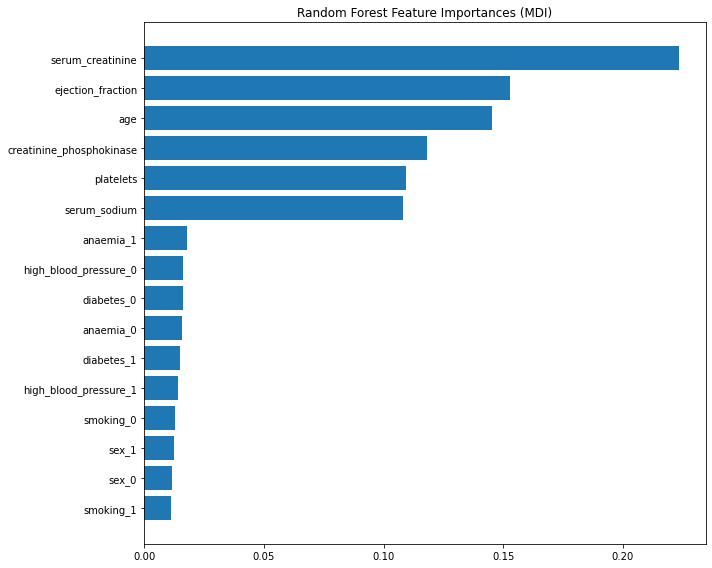

In [119]:
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [120]:
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import matthews_corrcoef as mcc

In [121]:
from sklearn.metrics import make_scorer

mcc_scorer = make_scorer(mcc)

In [122]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=7, n_jobs=2)
sorted_idx = np.argsort(result.importances_mean)[::-1]

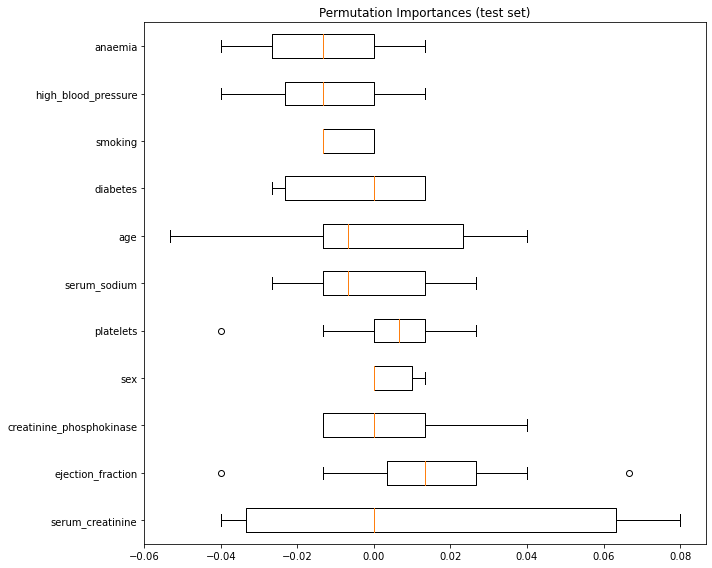

In [123]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

---

#### ML Prediction on all Clinical Features

In [124]:
X_clinical = X[clinical_features]

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.base import ClassifierMixin as Classifier
from collections import namedtuple

Prediction = namedtuple("Prediction", ["model", "y_hat", "y_true"])

In [148]:
import sys 

predictions_all = []
LEN_BAR = 40 
N_SPLITS = 100

for split_index in range(1, N_SPLITS+1):
    
    X_train, X_test, y_train, y_test = train_test_split(X_clinical, y, test_size=.2, 
                                                        stratify=y, 
                                                        random_state=split_index)
    
    rf = random_forest_hf_pipeline(random_state=split_index)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    prediction = Prediction(model=rf, y_hat=y_hat, y_true=y_test)
    predictions_all.append(prediction)
    
    frac = split_index/N_SPLITS
    n_progress = int(frac*LEN_BAR)
    message = ('Train/Test Split {} |{}{}{}| {}%'.format(split_index, '='*n_progress,
                                                         '>' if n_progress < LEN_BAR else '',
                                                         '.'*max(0, LEN_BAR - n_progress - 1),
                                                         int(frac*100),))
    sys.stdout.write('\r' + message)
    sys.stdout.flush()
    

Train/Test Split 100 |========================================| 100%

In [149]:
len(predictions_all)

100

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef as mcc

In [151]:
def bootstrap_ci(x, B=1000, alpha=0.05, seed=0):
    """Computes the (1-alpha) Bootstrap confidence interval
    from empirical bootstrap distribution of sample mean. 
        
    The lower and upper confidence bounds are the (B*alpha/2)-th 
    and B * (1-alpha/2)-th ordered means, respectively.
    For B = 1000 and alpha = 0.05 these are the 25th and 975th
    ordered means.
    """
    
    x_arr = np.ravel(x)

    if B < 2:
        raise ValueError("B must be >= 2")
    
    if alpha < 0 or alpha > 1:
        raise ValueError("alpha must be in [0, 1]")

    np.random.seed(seed)
    
    bmean = np.empty(B, dtype=np.float)
    for b in range(B):
        idx = np.random.randint(0, x_arr.shape[0]-1, x_arr.shape[0])
        bmean[b] = np.mean(x_arr[idx])
        
    bmean.sort()
    lower = int(B * (alpha * 0.5))
    upper = int(B * (1 - (alpha * 0.5)))
    
    return bmean[lower], bmean[upper]

In [152]:
mcc_all = np.asarray([mcc(p.y_true, p.y_hat) for p in predictions_all])
acc_all = np.asarray([accuracy_score(p.y_true, p.y_hat) for p in predictions_all])

In [153]:
print('ACC\t(+- CI)\n{:.3f} ({:.3f}; {:.3f})'.format(acc_all.mean(), *bootstrap_ci(acc_all)))
print()
print('MCC\t(+- CI)\n{:.3f} ({:.3f}; {:.3f})'.format(mcc_all.mean(), *bootstrap_ci(mcc_all)))

ACC	(+- CI)
0.731 (0.723; 0.741)

MCC	(+- CI)
0.344 (0.322; 0.369)


In [170]:
"""Python/Numpy implementation of the Borda Count"""

import numpy as np
from nptyping import NDArray
from typing import Tuple, Union, List, Any

RankingsList = Union[NDArray[(Any, Any), np.int], List[List[int]]]
Ranking = NDArray[(Any,), np.int]
Counts = NDArray[(Any,), np.int]
AveragePositions = NDArray[(Any,), np.float]
Borda = Tuple[Ranking, Counts, AveragePositions]


def borda(X: RankingsList, min_score: float = 1, k: int = None) -> Borda:
    """Given N ranked ids lists of length P compute the number of
    extractions on top-k positions and the mean position for each id.
    Sort the element ids (in reversed DECREASING order) based on the
    Borda Extraction Scores (BES). IDs having the same BES will be sorted
    by their increasing average position (i.e. the average of the position
    of each ID in all the rankings).
    Parameters
    ----------
    X : Numpy array of integer with shape [N, P] or List of Lists
        The list of rankings
    min_score: float, optional
        Minimum score considered for IDs (Default is 1)
    k : int, optional
        Top-K positions to select.
        Default is None, which means that all the positions will be
        selected (i.e. k = P)
    Returns
    -------
    Borda
        A tuple containing three NDarray:
        1. Sorted IDs, i.e. the Borda Ranking;
        2. The number of Extractions, i.e. Count;
        3. The average positions of each ID.
    Raises
    ------
    ValueError
        If k < 1 or k > p
    ValueError
        If X contains duplicate IDs
    """

    x_np = np.asarray(X)  # make sure X is a Numpy array for efficiency
    n, p = x_np.shape
    if k is None:
        k = p
    if not 1 <= k <= p:
        raise ValueError(f"k must be in [1, {p}], {k} given instead!")
    # Verify that ranked lists do no contain repetitions
    unique_ids = np.asarray([len(set(r)) for r in x_np[:]])
    if len(unique_ids[unique_ids < p]):
        raise ValueError(
            f"IDs in list of rankings are not unique! Unique IDs found: {unique_ids}"
        )

    positions = np.argsort(x_np, axis=1)
    # Select TopK by forcing positions of others to last position
    positions[positions >= k] = p
    # Calculate scores of extractions in each ranking based on their relative position
    exts = (p - positions - 1 + min_score).sum(axis=0)
    # Count total number of valid extractions
    counts = (positions < k).sum(axis=0)
    # Reset all non-valid positions (>=k) for TopK selection
    positions[positions >= k] = 0
    # Calculate Average positions of each element in each ranking
    non_zero_counts = counts != 0
    avg_positions = positions.sum(axis=0) / np.where(non_zero_counts, counts, 1)
    avg_positions[~non_zero_counts] = p - 1
    # Sort rankings based on average positions, and extraction scores
    idx = np.lexsort((avg_positions, exts))[::-1]

    return idx, counts[idx], avg_positions[idx]

In [162]:
feature_rankings = [np.argsort(p.model.named_steps['classifier'].feature_importances_)[::-1]
                    for p in predictions_all]

In [165]:
feature_rankings = np.vstack(feature_rankings)
feature_rankings.shape

(100, 16)

In [171]:
borda_ranking, _, _ = borda(feature_rankings)

In [167]:
len(borda_ranking)

16

In [169]:
print(feature_names[borda_ranking])

['serum_creatinine' 'ejection_fraction' 'age' 'creatinine_phosphokinase'
 'platelets' 'serum_sodium' 'diabetes_0' 'diabetes_1'
 'high_blood_pressure_0' 'anaemia_1' 'high_blood_pressure_1' 'anaemia_0'
 'sex_0' 'sex_1' 'smoking_0' 'smoking_1']


### Logistic Regression (as a NN)

In [271]:
import torch
from torch import nn
from torch import functional as F

In [272]:
class LogisticNet(nn.Module):
    
    def __init__(self, in_features):
        super(LogisticNet, self).__init__()
        self.fc = nn.Linear(in_features, 1)
        
    def forward(self, x, apply_logistic=False):
        x = self.fc(x)
        if apply_logistic:
            x = torch.sigmoid(x)
        return x

In [273]:
model = LogisticNet(in_features=2)

In [274]:
X_clinical.columns

Index(['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'age',
       'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')

In [275]:
X_top_features = X_clinical.loc[:, ['serum_creatinine', 'ejection_fraction']]

In [276]:
X_top_features

,serum_creatinine,ejection_fraction
0,1.9,20
1,1.1,38
2,1.3,20
3,1.9,20
4,2.7,20
...,...,...
294,1.1,38
295,1.2,38
296,0.8,60
297,1.4,38


In [292]:
X_top_train, X_top_test, y_train, y_test = train_test_split(X_top_features, y, 
                                                            test_size=.2, 
                                                            stratify=y, random_state=42)

In [293]:
X_top_train, X_top_val, y_train, y_val = train_test_split(X_top_train, y_train, 
                                                          test_size=.2,
                                                          stratify=y_train, random_state=42)

In [294]:
from torch.utils.data import TensorDataset, DataLoader

In [295]:
training_set = TensorDataset(torch.from_numpy(X_top_train.values),
                             torch.from_numpy(y_train.values[..., np.newaxis]))
train_loader = DataLoader(training_set, batch_size=4, 
                          drop_last=False, shuffle=True)

In [298]:
validation_set = TensorDataset(torch.from_numpy(X_top_val.values), 
                               torch.from_numpy(y_val.values[..., np.newaxis]))
val_loader = DataLoader(validation_set, batch_size=4, drop_last=False, shuffle=False)

In [299]:
test_set = TensorDataset(torch.from_numpy(X_top_test.values),
                         torch.from_numpy(y_test.values[..., np.newaxis]))
test_loader = DataLoader(test_set, batch_size=4, drop_last=False, shuffle=False)

In [300]:
learning_rate = 1e-4
n_epochs = 20

bce_loss = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [301]:
import os 
MODEL_FOLDER = os.path.join(os.path.abspath(os.path.dirname('__file__')), 'hfc_torch_model')
os.makedirs(MODEL_FOLDER, exist_ok=True)


model_file = os.path.join(MODEL_FOLDER, 'hfc_logistic_net_trained.model')

In [ ]:
from IPython.display import clear_output

def show_summary(model, train_loss, print_test=False):
    clear_output()
    print('================= Summary =================')
    print('Training loss: {}'.format(train_loss/len(train_set)))
    compute_metrics(model, val_loader, 'Validation', len(valid_set))
    if print_test:
        compute_metrics(model, test_loader, 'Test', len(test_set))
    print('===========================================')
    print()

In [290]:
import sys

LEN_BAR = 40

for e in range(1, n_epochs+1):
    total_train_loss = 0
    n_samples = 0
    
    for i, train_batch in enumerate(train_loader):
        x_train, y_train = train_batch
        n_samples += len(x_train)

        # Call the Model to calculate the logits
        logits = model(x_train.float())
        loss = bce_loss(logits, y_train.float())
        total_train_loss += loss.item() * len(x_train)
        
        # Zero gradients, perform a backward pass, and update the weights.
        optimiser.zero_grad() 
        # Activate Backward Prop.
        loss.backward()
        # Trigger a step for the optimiser
        optimiser.step()

        if i % 10 == 0:  # Checkpoint
            frac = i/len(train_loader)
            n_progress = int(frac*LEN_BAR)
            message = ('Epoch {} |{}{}{}| {:0.2f}% (Batch Loss: {:0.5f}, Average Loss: {:0.5f})'.format(
                e,
                '='*n_progress,
                '>' if n_progress < LEN_BAR else '',
                '.'*max(0, LEN_BAR - n_progress - 1),
                frac*100,
                loss.item(),
                total_train_loss/n_samples
            ))
            sys.stdout.write('\r' + message)
            sys.stdout.flush()
            # Save Checkpoint
            torch.save(model.state_dict(), model_file) # save
            
    if e > 1 and (e % 5 == 0):
        with torch.no_grad():
            acc_valid = []
            mcc_valid = []
            for i, val_batch in enumerate(val_loader):
                x_val, y_val = val_batch
                y_pred_val = model(x_val.float(), apply_logistic=True)
                y_pred_val = y_pred_val.numpy()
                y_pred_val[y_pred_val < .5] = 0
                y_pred_val[y_pred_val >= .5] = 1
                # evaluate accuracy and MCC metrics on validation batch
                acc_batch = acc(y_val.numpy(), y_pred_val)
                mcc_batch = mcc(y_val.numpy(), y_pred_val)
                # add to the list
                mcc_valid.append(mcc_batch)
                acc_valid.append(acc_batch)
            sys.stdout.flush()
            sys.stdout.write('\r Validation ACC: {}'.format(np.mean(np.asarray(acc_valid))))
            sys.stdout.write('\r Validation MCC: {}'.format(np.mean(np.asarray(mcc_valid))))
    
torch.save(model.state_dict(), model_file) # save

 Validation MCC: 0.21477918909913551=======>......| 83.33% (Batch Loss: 0.55787, Average Loss: 0.56085)

In [289]:
with torch.no_grad():
    acc_test= []
    mcc_test = []
    for i, test_batch in enumerate(test_loader):
        x_test, y_test = test_batch
        y_pred_test = model(x_test.float(), apply_logistic=True)
        y_pred_test = y_pred_test.numpy()
        y_pred_test[y_pred_test < .5] = 0
        y_pred_test[y_pred_test >= .5] = 1
        
        # evaluate accuracy and MCC metrics on validation batch
        acc_batch = acc(y_test.numpy(), y_pred_test)
        mcc_batch = mcc(y_test.numpy(), y_pred_test)
        # add to the list
        mcc_test.append(mcc_batch)
        acc_test.append(acc_batch)
    print('Test ACC: ', np.mean(np.asarray(acc_test)))
    print('Test MCC: ', np.mean(np.asarray(mcc_test)))

Test ACC:  0.7
Test MCC:  0.10515668461264172
